# Interactive Graphs with Plotly & Bokeh

## What you'll learn in this course 

Creating graphs is important. Seaborn & Matplolib are the basics when it comes to static graphics but sometimes, you will need to create visualisations that users can interact with. This is when Plotly & Bokeh comes in handy. These libraries will allow you to create any type of graphs that any user can interact with. 

You might wonder why we cover two libraries that seem to do the same thing. This is because we feel that Bokeh is really better at handling Maps graphics and Plotly is great at doing everything else. 

Here is what we will cover: 

* Representing Figures with Plotly 
* Display basic graphs with Plotly Express 
* Display 3D Graphs with Plotly
* Create subplots with Plotly 
* Create animations with Plotly 



## Install Plotly 

Let's get started by installing plotly with pip

In [3]:
# VOUS DEVEZ D ABORD INSTALLER CES LIBRAIRIES POUR POUVOIR AFFICHER PLOTLY SUR VOTRE NOTEBOOK 
!pip install plotly==4.8.1
!jupyter labextension install jupyterlab-plotly

Building jupyterlab assets (build:prod:minimize)


## Representing Figures with Plotly

There are two ways of representing graphs with Plotly: 

1. As Python Dictionnaries 
2. As Graph Objects 

Let's check out both to see the difference. 

### Python Dictionnaries 

Python dictionnaries are the easiest method to plot graphs. 

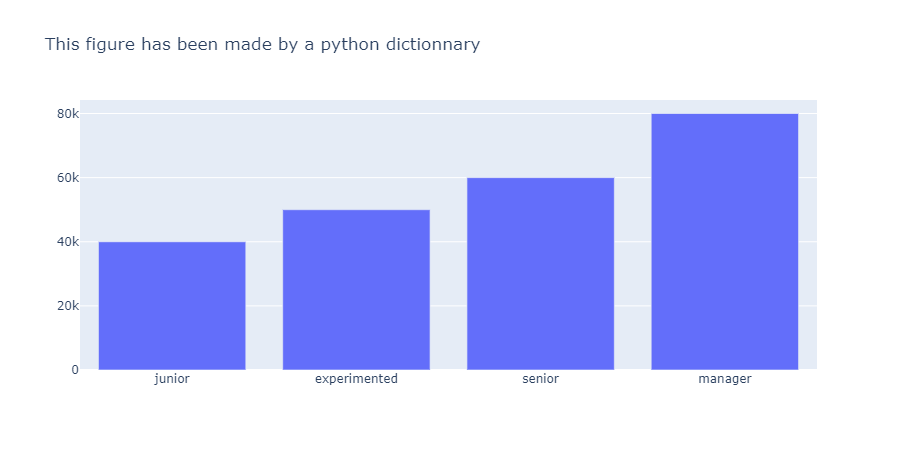

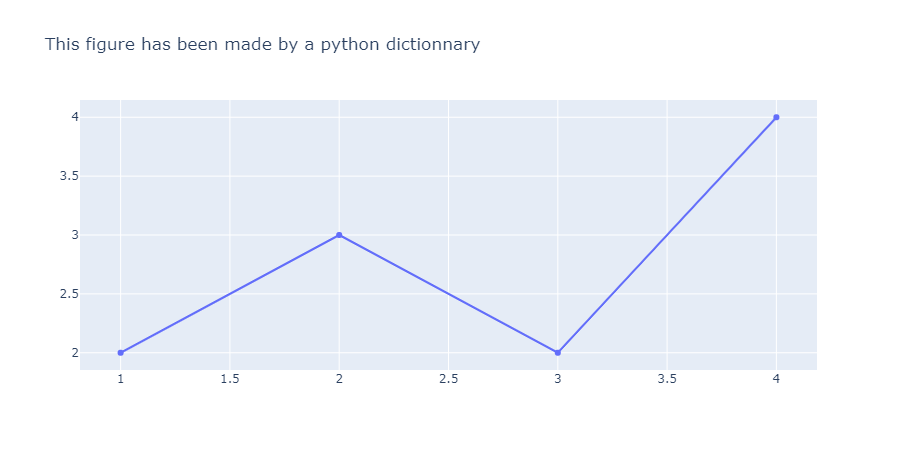

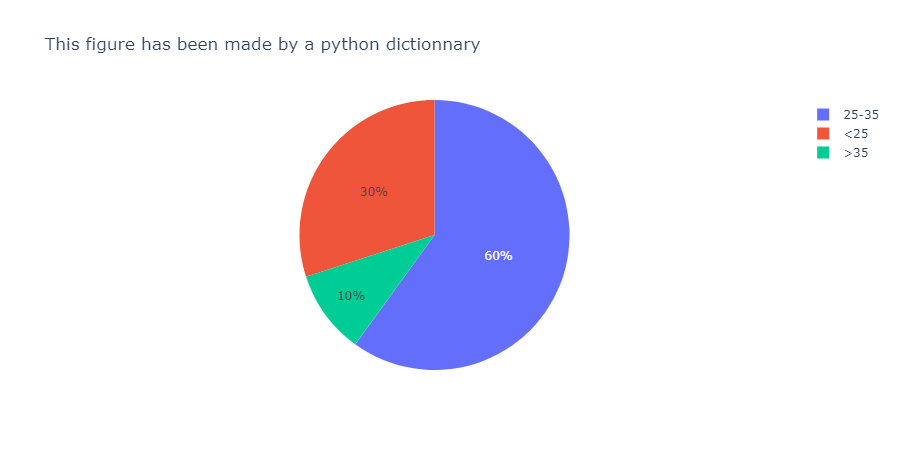

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
import plotly

# Create dictionnary
fig = {
    'data': [{
        "type": "bar",
        "x": ["junior", "experimented", "senior", "manager"],
        "y": [40000, 50000, 60000, 80000]
    }],

    "layout": {
        "title": {
            "text": "This figure has been made by a python dictionnary"
        }
    }
}

# Show figure
pio.show(fig)

# Create dictionnary
fig = {
    'data': [{
        "type": "scatter",
        "x": [1, 2, 3, 4],
        "y": [2, 3, 2, 4]
    }],

    "layout": {
        "title": {
            "text": "This figure has been made by a python dictionnary"
        }
    }
}

# Show figure
pio.show(fig)

# Create dictionnary
fig = {
    'data': [{
        "type": "pie",
        "labels": ["<25", "25-35",">35"],
        "values": [.3,.6,.1]
    }],

    "layout": {
        "title": {
            "text": "This figure has been made by a python dictionnary"
        }
    }
}

# Show figure
pio.show(fig)

The `data` key lets you provide your data and type of graph you want to create. You can chose among all these values: 

```
['area', 'bar', 'barpolar', 'box',
'candlestick', 'carpet', 'choropleth',
'choroplethmapbox', 'cone', 'contour',
'contourcarpet', 'densitymapbox', 'funnel',
'funnelarea', 'heatmap', 'heatmapgl',
'histogram', 'histogram2d',
'histogram2dcontour', 'image', 'indicator',
'isosurface', 'mesh3d', 'ohlc', 'parcats',
'parcoords', 'pie', 'pointcloud', 'sankey',
'scatter', 'scatter3d', 'scattercarpet',
'scattergeo', 'scattergl', 'scattermapbox',
'scatterpolar', 'scatterpolargl',
'scatterternary', 'splom', 'streamtube',
'sunburst', 'surface', 'table', 'treemap',
'violin', 'volume', 'waterfall']
```


the `layout` key lets you style your graph as much as you like. Check out the [API Reference](https://plot.ly/python/reference/?_ga=2.3455664.1414469668.1590913316-1935466224.1590913316) if you want to know everything you can do with it. 

### Utiliser des Graph Objects pour construire des graphs

- Liste des fonctions disponibles ici: https://plotly.com/python-api-reference/plotly.graph_objects.html#graph-objects

- Meilleure gestion d'erreurs que si l'on fournit un dict

- On peut accéder à tous les types de graph directement plutôt que d'aller lire la notice

Graph Objects gives you more flexibility as you will use Python classes to configure your graph. As the documentation states, it has several benefits: 

* _Graph objects provide precise data validation. If you provide an invalid property name or an invalid property value as the key to a graph object, an exception will be raised with a helpful error message describing the problem. This is not the case if you use plain Python dictionaries and lists to build your figures._

* _Graph objects contain descriptions of each valid property as Python docstrings. You can use these docstrings in the development environment of your choice to learn about the available properties as an alternative to consulting the online Full Reference._

* _Properties of graph objects can be accessed using both dictionary-style key lookup (e.g. `fig["layout"]`) or class-style property access (e.g. fig.layout)._

* _Graph objects support higher-level convenience functions for making updates to already constructed figures, as described below._

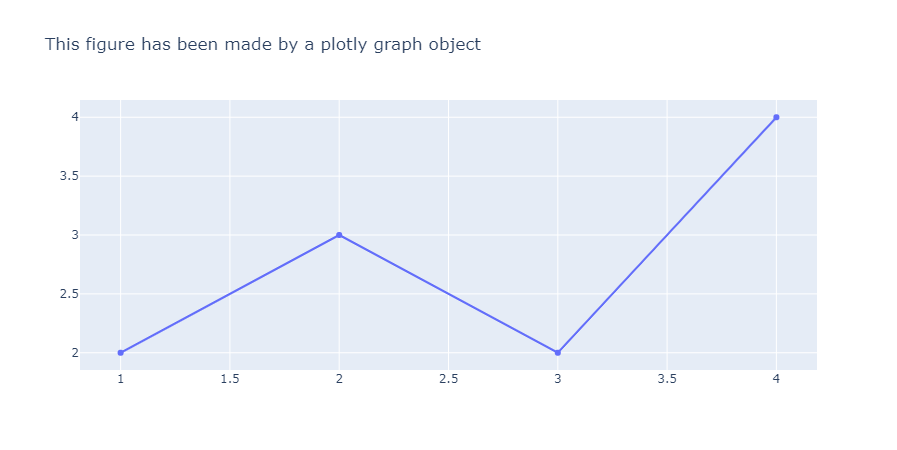

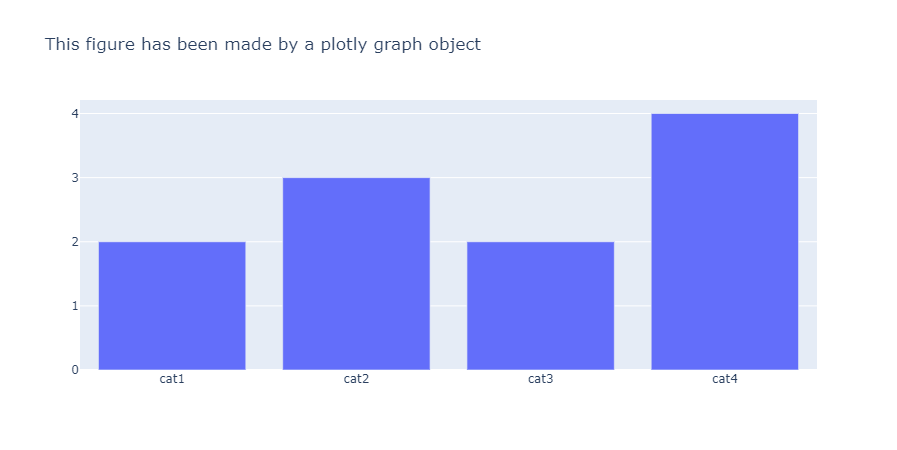

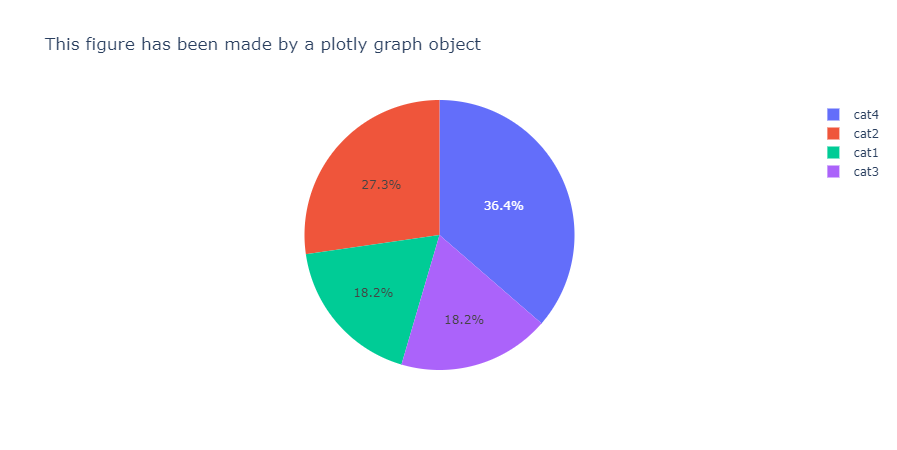

In [5]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[1, 2, 3, 4], y=[2, 3, 2, 4])],
    layout=go.Layout(
        title=go.layout.Title(text="This figure has been made by a plotly graph object")
    )
)

fig.show()


fig = go.Figure(
    data=[go.Bar(x=["cat1","cat2","cat3","cat4"], y=[2, 3, 2, 4])],
    layout=go.Layout(
        title=go.layout.Title(text="This figure has been made by a plotly graph object")
    )
)

fig.show()

fig = go.Figure(
    data=[go.Pie(labels=["cat1","cat2","cat3","cat4"], values=[2, 3, 2, 4])],
    layout=go.Layout(
        title=go.layout.Title(text="This figure has been made by a plotly graph object")
    )
)

fig.show()

## Basic Graphs with Plotly Express 

- La plupart des graphs dont vous aurez besoin peuvent s'appeler directement avec plotly_express : https://plotly.com/python-api-reference/

Plotly Express is the high level API of plotly that will allow you to create basic graphs very simply. 

In [64]:
import plotly.express as px
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


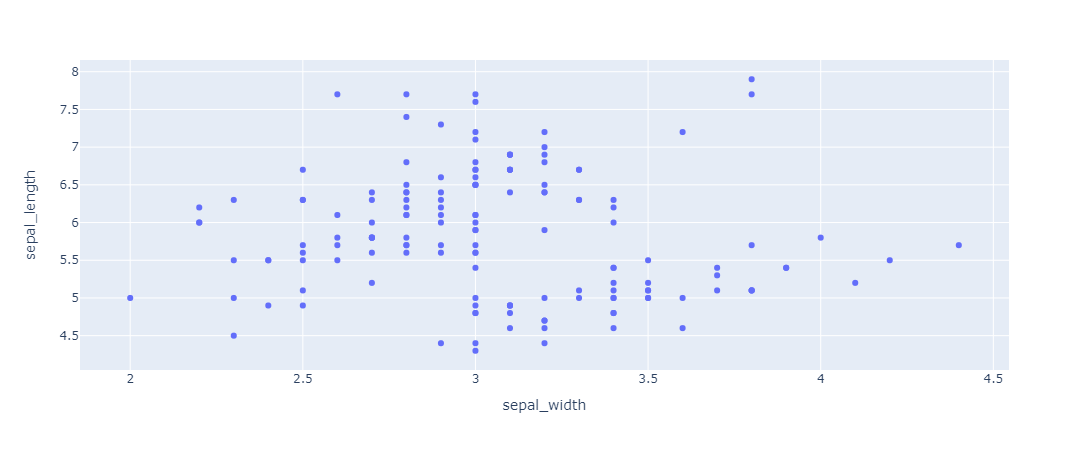

In [66]:
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

## N'hésitez pas à run ```?px.function_name``` dans jupyter pour avoir de l'info sur comment utiliser la fonction
As you can see, you can specify any type of graph, simply by doing: `px.some_graph()`. Here is a list of what you can do:

* [px.scatter](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)
* [px.scatter_3d ](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html)
* [px.scatter_polar](https://plotly.com/python-api-reference/generated/plotly.express.scatter_polar.html)
* [px.scatter_ternary](https://plotly.com/python-api-reference/generated/plotly.express.scatter_ternary.html)
* [px.scatter_mapbox](https://plotly.com/python-api-reference/generated/plotly.express.scatter_mapbox.html)
* [px.scatter_geo](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html)
* [px.line](https://plotly.com/python-api-reference/generated/plotly.express.line.html)
* [px.line_3d](https://plotly.com/python-api-reference/generated/plotly.express.line_3d.html)
* [px.line_polar](https://plotly.com/python-api-reference/generated/plotly.express.line_polar.html)
* [px.line_ternary](https://plotly.com/python-api-reference/generated/plotly.express.line_ternary.html)
* [px.line_mapbox](https://plotly.com/python-api-reference/generated/plotly.express.line_mapbox.html)
* [px.line_geo](https://plotly.com/python-api-reference/generated/plotly.express.line_geo.html)
* [px.area](https://plotly.com/python-api-reference/generated/plotly.express.area.html)
* [px.bar](https://plotly.com/python-api-reference/generated/plotly.express.bar.html)
* [px.bar_polar](https://plotly.com/python-api-reference/generated/plotly.express.bar_polar.html)
* [px.violin](https://plotly.com/python-api-reference/generated/plotly.express.violin.html)
* [px.box](https://plotly.com/python-api-reference/generated/plotly.express.box.html)
* [px.strip](https://plotly.com/python-api-reference/generated/plotly.express.strip.html)
* [px.histogram](https://plotly.com/python-api-reference/generated/plotly.express.histogram.html)
* [px.pie](https://plotly.com/python-api-reference/generated/plotly.express.pie.html)
* [px.treemap](https://plotly.com/python-api-reference/generated/plotly.express.treemap.html)
* [px.sunburst](https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html)
* [px.funnel](https://plotly.com/python-api-reference/generated/plotly.express.funnel.html)
* [px.funnel_area](https://plotly.com/python-api-reference/generated/plotly.express.funnel_area.html)
* [px.scatter_matrix](https://plotly.com/python-api-reference/generated/plotly.express.scatter_matrix.html)
* [px.parallel_coordinates](https://plotly.com/python-api-reference/generated/plotly.express.parallel_coordinates.html)
* [px.parallel_categories](https://plotly.com/python-api-reference/generated/plotly.express.parallel_categories.html)
* [px.choropleth](https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html)
* [px.choropleth_mapbox](https://plotly.com/python-api-reference/generated/plotly.express.choropleth_mapbox.html)
* [px.density_contour](https://plotly.com/python-api-reference/generated/plotly.express.density_contour.html)
* [px.density_heatmap](https://plotly.com/python-api-reference/generated/plotly.express.density_heatmap.html)
* [px.density_mapbox](https://plotly.com/python-api-reference/generated/plotly.express.density_mapbox.html)
* [px.imshow](https://plotly.com/python-api-reference/generated/plotly.express.imshow.html)





For each graph, you will be able to specify arguments that will allow you to add granularity and precision to your graphs. 

### Color separation 

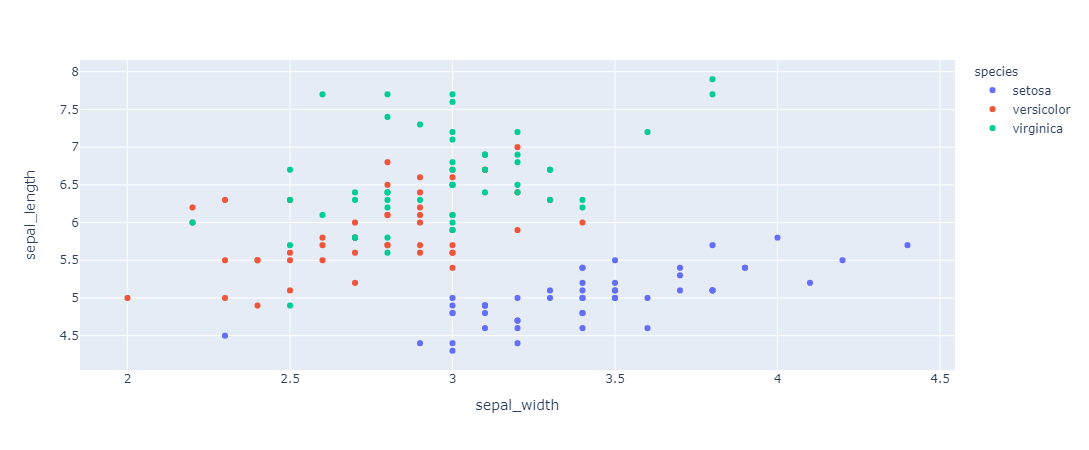

In [70]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

### Marginal and trendline 

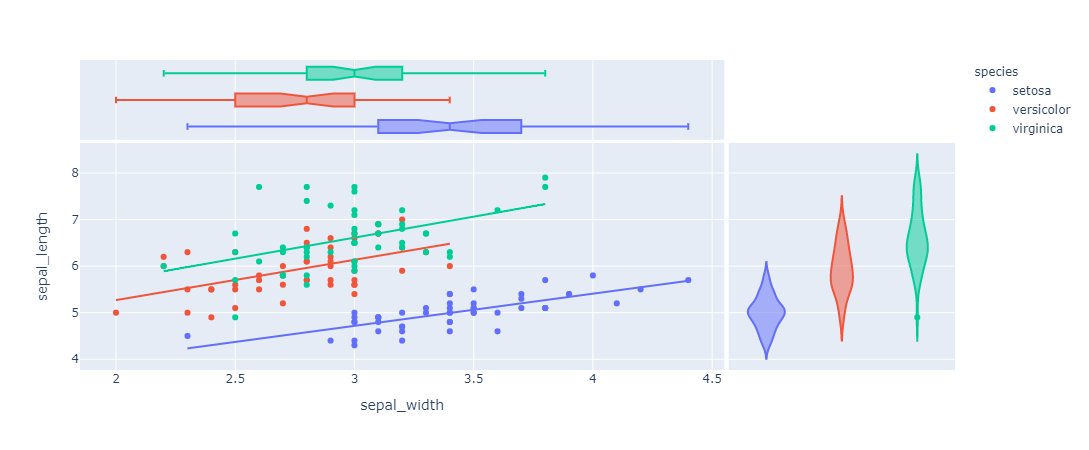

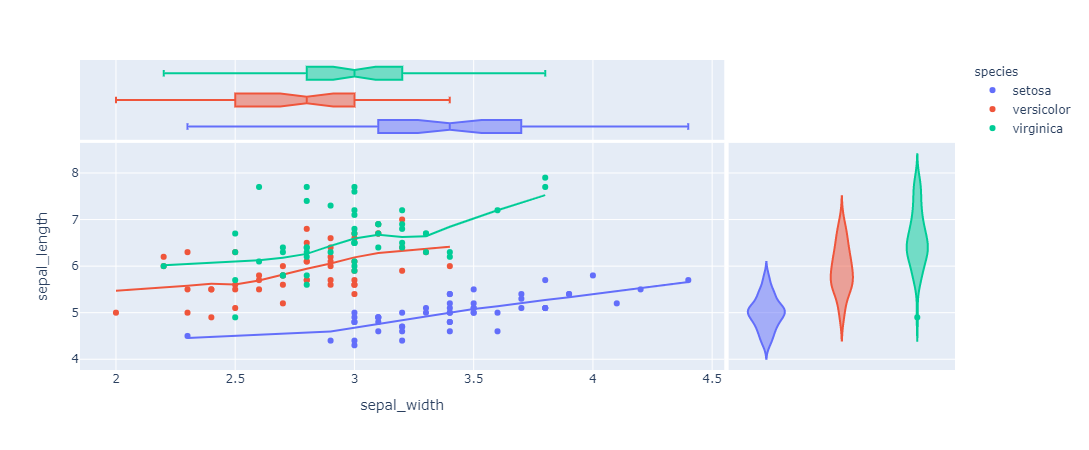

In [73]:
df = px.data.iris()

# On plotte une trend linéaire au global
fig = px.scatter(df, 
                 x="sepal_width", 
                 y="sepal_length", 
                 color="species", 
                 marginal_y="violin",
                 marginal_x="box",
                 trendline="ols")
fig.show()

# On plotte une trend approximée localement
fig = px.scatter(df, 
                 x="sepal_width", 
                 y="sepal_length", color="species", marginal_y="violin",marginal_x="box", trendline="lowess")
fig.show()

### Categories 


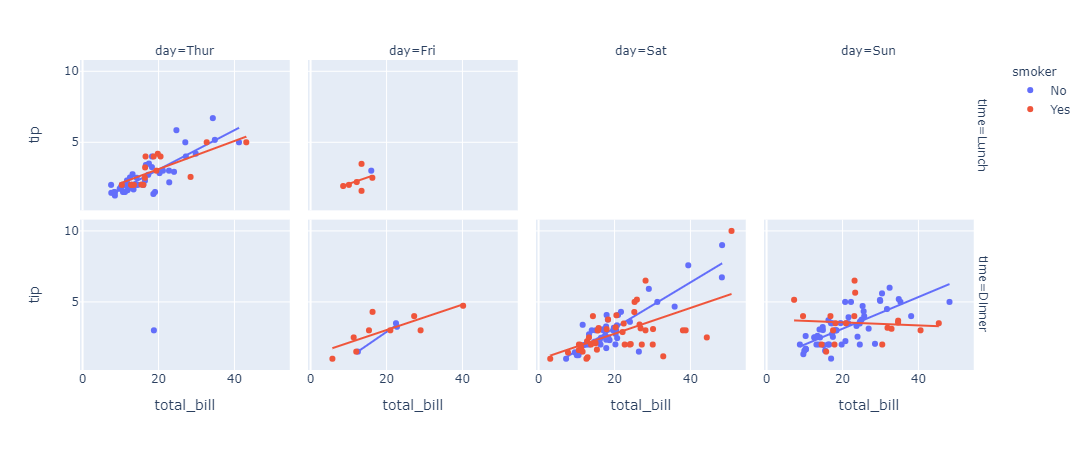

In [77]:
# Create categories 

# facet_col va splitter par l'argument fourni et tracer autant de graphs en colonne qu'il y a de modalités dans l'argument
# facet_row va splitter par l'argument fourni et tracer autant de graphs en ligne qu'il y a de modalités dans l'argument

df = px.data.tips()
fig = px.scatter(df, 
                 x="total_bill", 
                 y="tip", 
                 facet_row="time", 
                 facet_col="day", 
                 color="smoker", 
                 trendline="ols",
          category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
fig.show()

## 3D Graphs

3D Graphs are especially useful when you need to add another ax and try to understand how clusters are made. You do it very simply with Plotly. 

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


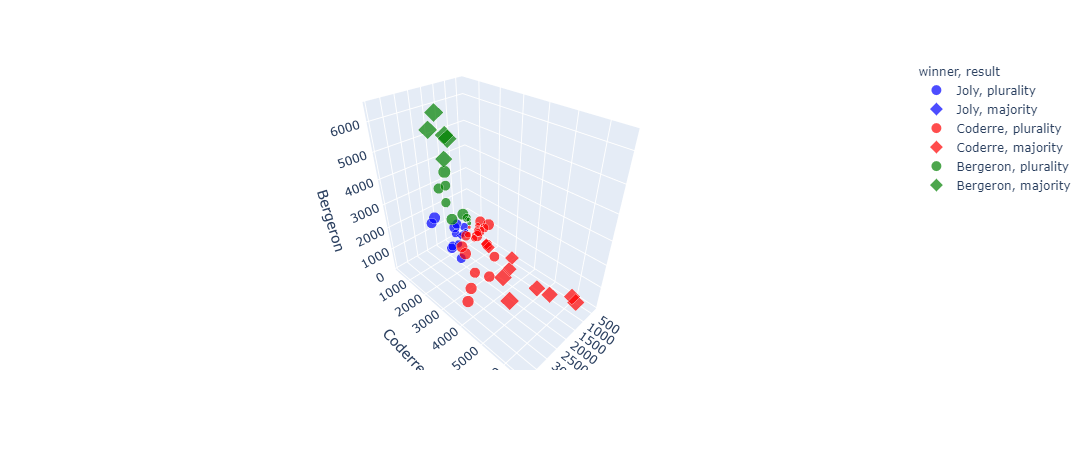

In [81]:
df = px.data.election()
display(df)
fig = px.scatter_3d(df, 
                    x="Joly", 
                    y="Coderre", 
                    z="Bergeron", 
                    color="winner", 
                    size="total", 
                    hover_name="district",
                    symbol="result", 
                    color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()

plotly.offline.plot(fig, filename='name.html')

### Create Subplots with Plotly 

Create Subplots can be very useful when you need to emphasize on certain categories of your dataset. Here is how you can do it with Plotly. 

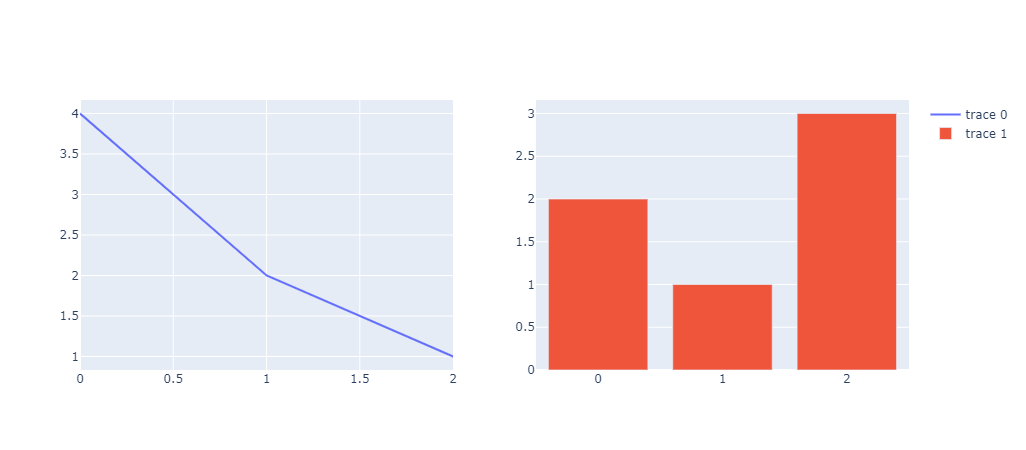

In [114]:
from plotly.subplots import make_subplots

# Passer par go. et non px. pour ajouter des plots à un subplot
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)
fig.show()

We create a subplot that has 1 row and 2 columns. However, we haven't add any graphs. Let's do that by adding `traces`

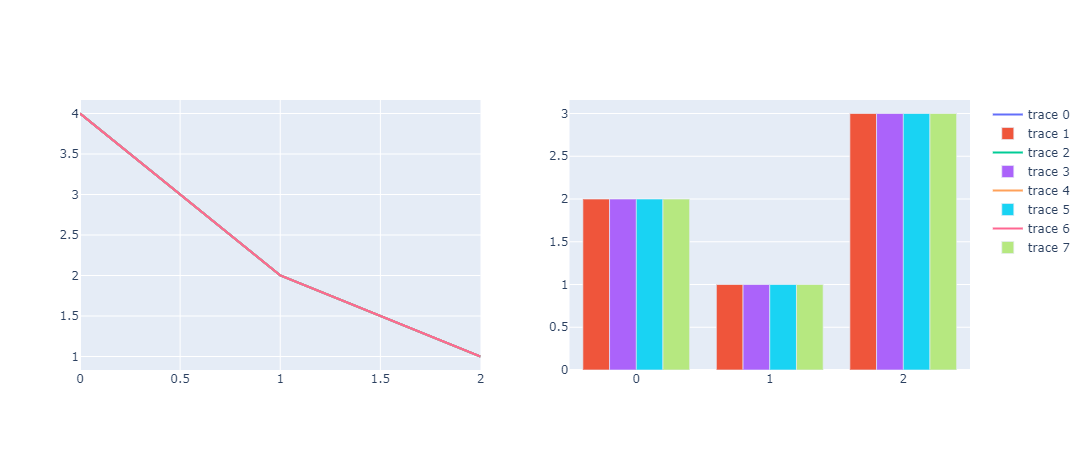

In [93]:
fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)
fig.show()

That looks better. You can do anything you want now like adding `traces` to a scatter plot that you created. 

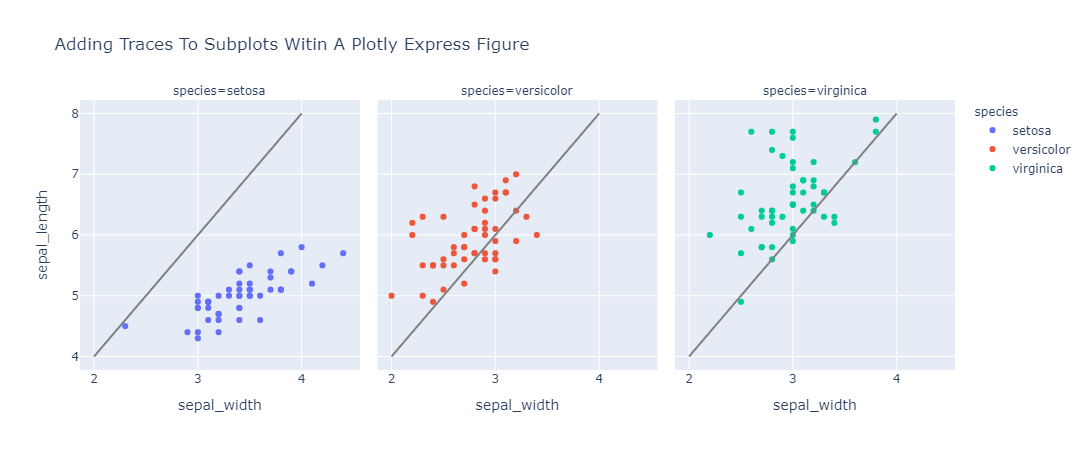

In [98]:
df = px.data.iris()

# On trace les 3 plots cote a cote avec facet_col="species"
fig = px.scatter(df, 
                 x="sepal_width", 
                 y="sepal_length", 
                 color="species", 
                 facet_col="species",
                 title="Adding Traces To Subplots Witin A Plotly Express Figure")

# On définit une ligne droite 
reference_line = go.Scatter(x=[2, 4],
                            y=[4, 8],
                            mode="lines",
                            line=go.scatter.Line(color="gray"),
                            showlegend=False)

# On ajoute cette ligne sur chacun des graphs
fig.add_trace(reference_line, row=1, col=1)
fig.add_trace(reference_line, row=1, col=2)
fig.add_trace(reference_line, row=1, col=3)

## Add Animations to your graph

Animations are very useful when you want to show to dynamic data over time. Let's check out how we can do it with Plotly. 

In [99]:
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


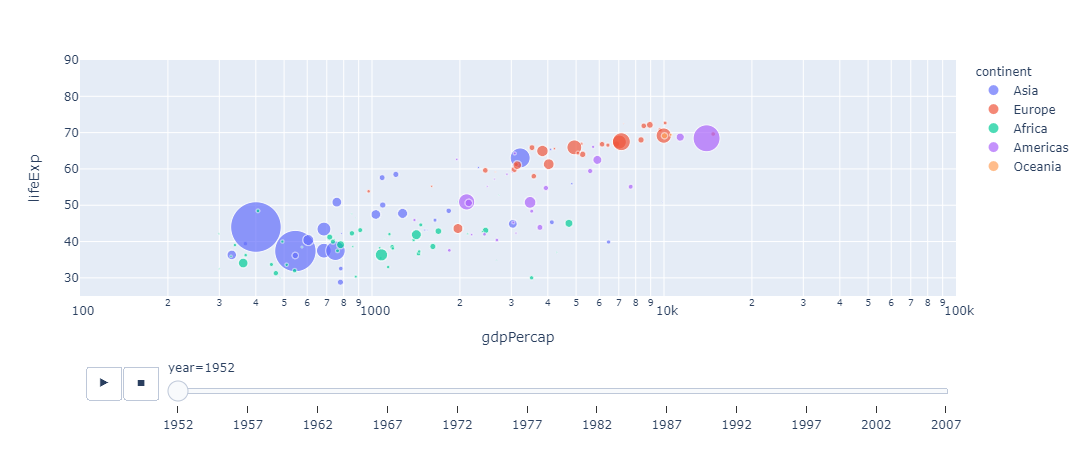

In [108]:
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, # avec cette echelle, 2 graduations dont le rapport vaut 10 sont situées à égale distance
                 size_max=55, 
                 range_x=[100,100000], 
                 range_y=[25,90])

fig.show()

What you need to pay attention are these two parameters: 

* `animation_frame`
* `animation_group`

The first parameter is the one that determines the period where your graph is going to be updated. The second one is specifying which column the animation is going to be applied to. 

### Trouble Shooting Animations 

Depending on the IDE you are using, you might experience bugs and animations that are not working. If that happens, you can use `plotly.offline.plot` method that will open up your animation in a web browser. 

In [38]:
from plotly.offline import plot

df = px.data.gapminder()
fig=px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
plot(fig)

'temp-plot.html'

In [109]:
# Save plotly on machine
plotly.offline.plot(fig, filename='name.html')

'name.html'

## Resources 

* [Creating and Updating Figures in Python](https://plotly.com/python/creating-and-updating-figures/#make-subplots)
* [Make Subplots](https://plotly.com/python/creating-and-updating-figures/#make-subplots)
* [Intro to Animations in Python](https://plotly.com/python/animations/)
* [How to make Plotly graph animated working](https://stackoverflow.com/questions/61176493/how-to-make-plotly-graph-animated-working)
